# Sentiment Analysis in Python

Using the VADER Model (Valence Aware Dictionary and Sentiment Reasoner)
It is available in the NLTK package and can be applied directly to unlabeled text data

In [49]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import nltk
from tqdm.notebook import tqdm
from nltk.sentiment import SentimentIntensityAnalyzer

plt.style.use('ggplot')

sia = SentimentIntensityAnalyzer()

In [50]:
df = pd.read_csv('/kaggle/input/amazon-fine-food-reviews/Reviews.csv')
df.shape

(568454, 10)

In [51]:
# The Dataset is 0.5M in Rows - Lets pick up a sample for our use case

df = df.head(2000) # We have the first 2000 Rows of the dataset
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [52]:
review_count = df['Score'].value_counts().sort_index()
print(review_count)

1     178
2     103
3     162
4     254
5    1303
Name: Score, dtype: int64


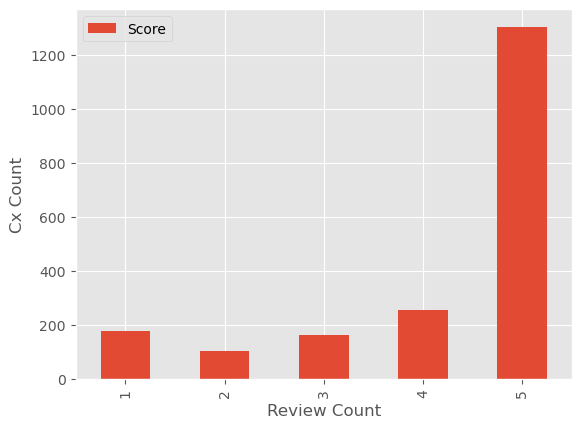

In [53]:
graph_review_count = review_count.plot(kind= 'bar', legend= True)
graph_review_count.set_xlabel('Review Count')
graph_review_count.set_ylabel('Cx Count')
plt.show()

In [54]:
# Basic Sentiment Scoring

sia.polarity_scores('I am very happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [55]:
sia.polarity_scores('I am very disappointed')

{'neg': 0.629, 'neu': 0.371, 'pos': 0.0, 'compound': -0.5256}

In [56]:
# Parsing a single text cell from the DataFrame

text = df['Text'][0]
print(text)

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.


In [57]:
# Checking the polarity scores of the above text cell

sia.polarity_scores(text)

{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}

In [58]:
# Running the polarity scores of the overall dataset

vader_dict = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    num = row['Id']
    vader_dict[num] = sia.polarity_scores(text)

  0%|          | 0/2000 [00:00<?, ?it/s]

In [59]:
# Vader Dataframe Snapshot

vader_dict

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.079, 'neu': 0.853, 'pos': 0.068, 'compound': -0.1027},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},

In [60]:
# Converting Vaders Dictionary to DataFrame

vader_df = pd.DataFrame(vader_dict)
vader_df

,1,2,3,4,5,6,7,8,9,10,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
neg,0.0000,0.0790,0.0910,0.0,0.0000,0.029,0.0340,0.0000,0.0000,0.0000,...,0.055,0.0290,0.0400,0.000,0.0000,0.0000,0.0250,0.0000,0.0530,0.0000
neu,0.6950,0.8530,0.7540,1.0,0.5520,0.809,0.6930,0.5200,0.8510,0.7050,...,0.787,0.8850,0.9600,0.915,0.7420,0.7540,0.7440,0.7190,0.8390,0.6430
pos,0.3050,0.0680,0.1550,0.0,0.4480,0.163,0.2730,0.4800,0.1490,0.2950,...,0.158,0.0860,0.0000,0.085,0.2580,0.2460,0.2310,0.2810,0.1080,0.3570
compound,0.9441,-0.1027,0.8265,0.0,0.9468,0.883,0.9346,0.9487,0.6369,0.8313,...,0.938,0.6115,-0.2144,0.640,0.9161,0.9744,0.9978,0.9501,0.7003,0.8892


In [61]:
# Transposing the Vader Dataframe to join it with the original dataset

vader_df = pd.DataFrame(vader_dict).T
vader_df = vader_df.reset_index().rename(columns={'index':'Id'})
vader_df = vader_df.merge(df, how= 'left')
vader_df

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.079,0.853,0.068,-0.1027,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,0.000,0.754,0.246,0.9744,B001E5E29A,A3IJNH61DY5N9K,Sharon Allan,10,11,5,1265846400,Great Waffles for us non-cooks,I have to laugh at the reviews that said it wa...
1996,1997,0.025,0.744,0.231,0.9978,B001E5E29A,A35W3JQYP0M655,"Ambergris ""John Thomas""",7,7,5,1279929600,Excellent Fluffy Pancakes.....,I had read some favorable reviews of this panc...
1997,1998,0.000,0.719,0.281,0.9501,B001E5E29A,A3CLWZGMC7M9Z1,"Hippie2MARS ""Hippie2MARS""",6,6,4,1250640000,Good Basic Mix,I was expecting great things based on the revi...
1998,1999,0.053,0.839,0.108,0.7003,B001E5E29A,A2V6P1FKRHCVQQ,S. Jackson,8,9,4,1265760000,"Good pancakes, lots of work",I love this pancake mix. I bought my first ca...


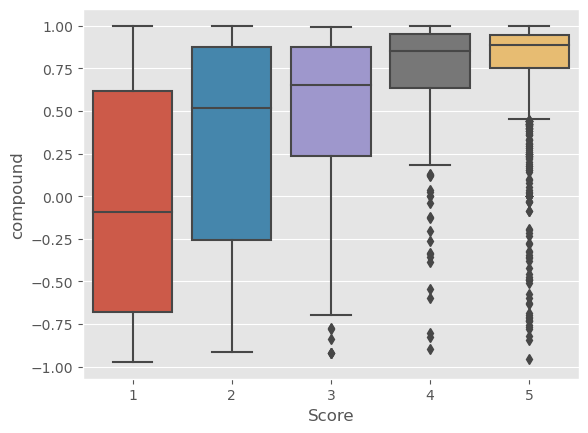

In [62]:
# Plotting Vader Results

vader_plot = sb.boxplot(data= vader_df, x= 'Score', y= 'compound')
plt.show()

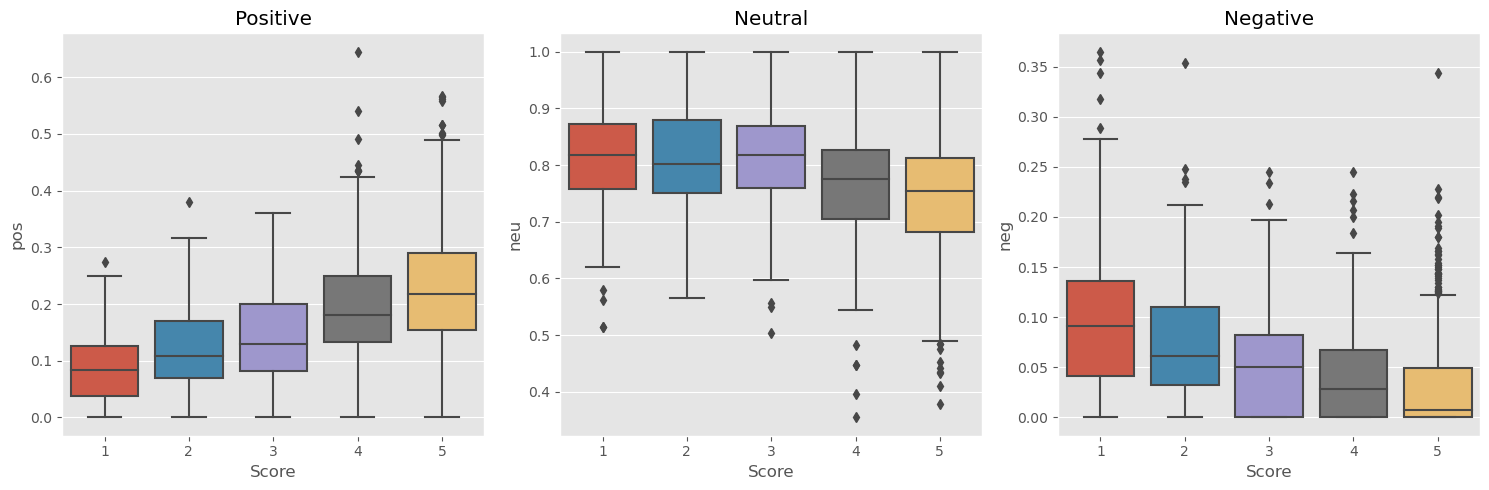

In [63]:
# Plotting positive // negative // neutral Reviews

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sb.boxplot(data=vader_df, x='Score', y='pos', ax=axs[0])
sb.boxplot(data=vader_df, x='Score', y='neu', ax=axs[1])
sb.boxplot(data=vader_df, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()